<a href="https://colab.research.google.com/github/SrvPioneer/International-T20-Match-Analysis/blob/main/International_T20_Match_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![T20](https://pbs.twimg.com/profile_images/2178435031/T20_International_logo_400x400.jpg)

##<b>The International Cricket Council (ICC) is the world governing body of cricket. It was founded as the Imperial Cricket Conference in 1909 by representatives from Australia, England and South Africa. It was renamed as the International Cricket Conference in 1965, and took up its current name in 1989. It organises world championship events such as Cricket World Cup, Women's Cricket World Cup, ICC T20 World Cup, ICC Women's T20 World Cup, ICC Champions Trophy and Under-19 Cricket World Cup.This data consists of 1417 T20 matches. Each row corresponds to a single T20 match.

##<b> We explore and analyze the data to discover the key understanding such as:
* ### Find out the top three venues and cities which hosted the greatest number of matches.
*### Find out the pair of cricket teams who played the most number of T20 matches.
* ### Find out the pair of cricket teams who played the most number of T20 matches against each other.
* ### Print the top five teams by their win percentages.
* ### Write a function to get the scorecard of each match.
* ### Top five bastmans and bolwers.
* ### Top five player of the match.
* ### Highest wicket taker blower and highest scorer batsman for singal match with team name.

In [104]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df = pd.read_csv("/content/drive/MyDrive/International_T20/International_T20_Data.csv")
df.head(50)

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-21,1,"[datetime.date(2016, 6, 20)]",male,T20,10.0,India,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"[{'1st innings': {'team': 'India', 'deliveries...",0.9,2016-06-25,1,"[datetime.date(2016, 6, 22)]",male,T20,NaN,India,20,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",0.9,2017-01-08,1,"[datetime.date(2017, 1, 3)]",male,T20,6.0,New Zealand,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"[{'1st innings': {'team': 'New Zealand', 'deli...",0.9,2017-01-08,1,"[datetime.date(2017, 1, 6)]",male,T20,NaN,New Zealand,20,...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[{'1st innings': {'team': 'New Zealand', 'deli...",0.9,2017-01-08,2,"[datetime.date(2017, 1, 8)]",male,T20,NaN,New Zealand,20,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.shape

(1417, 27)

In [108]:
df.columns = [x.replace(".", "_"). replace("meta_", "").replace("info_", "") for x in list(df.columns)]

In [109]:
df.columns

Index(['innings', 'data_version', 'created', 'revision', 'dates', 'gender',
       'match_type', 'outcome_by_wickets', 'outcome_winner', 'overs',
       'player_of_match', 'teams', 'toss_decision', 'toss_winner', 'umpires',
       'venue', 'city', 'outcome_by_runs', 'match_type_number',
       'neutral_venue', 'outcome_method', 'outcome_result',
       'outcome_eliminator', 'supersubs_New Zealand', 'supersubs_South Africa',
       'bowl_out', 'outcome_bowl_out'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   innings                 1417 non-null   object 
 1   data_version            1417 non-null   float64
 2   created                 1417 non-null   object 
 3   revision                1417 non-null   int64  
 4   dates                   1417 non-null   object 
 5   gender                  1417 non-null   object 
 6   match_type              1417 non-null   object 
 7   outcome_by_wickets      651 non-null    float64
 8   outcome_winner          1372 non-null   object 
 9   overs                   1417 non-null   int64  
 10  player_of_match         1255 non-null   object 
 11  teams                   1417 non-null   object 
 12  toss_decision           1417 non-null   object 
 13  toss_winner             1417 non-null   object 
 14  umpires                 1395 non-null   

In [111]:
T20_df = df.loc[:,["innings", "created", "outcome_winner", "player_of_match", "teams", "toss_decision", "toss_winner", "venue", "city"]]
T20_df = T20_df.rename(columns={"outcome_winner": "winner_team"})

In [112]:
T20_df.isnull().sum()

innings              0
created              0
winner_team         45
player_of_match    162
teams                0
toss_decision        0
toss_winner          0
venue                0
city               189
dtype: int64

In [113]:
T20_df.describe()

,innings,created,winner_team,player_of_match,teams,toss_decision,toss_winner,venue,city
count,1417,1417,1372,1255,1417,1417,1417,1417,1228
unique,1417,410,56,611,399,2,64,194,144
top,"[{'1st innings': {'team': 'Australia', 'delive...",2020-07-06,Australia,['V Kohli'],"['England', 'Pakistan']",field,Pakistan,Dubai International Cricket Stadium,Colombo
freq,1,65,132,12,29,710,113,62,57


In [114]:
T20_df.head(20)

,innings,created,winner_team,player_of_match,teams,toss_decision,toss_winner,venue,city
0,"[{'1st innings': {'team': 'Australia', 'delive...",2017-02-18,Sri Lanka,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,Melbourne Cricket Ground,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",2017-02-19,Sri Lanka,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"Simonds Stadium, South Geelong",Victoria
2,"[{'1st innings': {'team': 'Australia', 'delive...",2017-02-23,Australia,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,Adelaide Oval,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",2016-09-12,Hong Kong,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"Bready Cricket Club, Magheramason",Londonderry
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",2016-06-19,Zimbabwe,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,Harare Sports Club,NaN
5,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",2016-06-21,India,['BB Sran'],"['Zimbabwe', 'India']",bat,Zimbabwe,Harare Sports Club,NaN
6,"[{'1st innings': {'team': 'India', 'deliveries...",2016-06-25,India,['KM Jadhav'],"['Zimbabwe', 'India']",field,Zimbabwe,Harare Sports Club,NaN
7,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",2017-01-08,New Zealand,['KS Williamson'],"['New Zealand', 'Bangladesh']",bat,Bangladesh,McLean Park,Napier
8,"[{'1st innings': {'team': 'New Zealand', 'deli...",2017-01-08,New Zealand,['C Munro'],"['New Zealand', 'Bangladesh']",field,Bangladesh,Bay Oval,Mount Maunganui
9,"[{'1st innings': {'team': 'New Zealand', 'deli...",2017-01-08,New Zealand,['CJ Anderson'],"['New Zealand', 'Bangladesh']",field,Bangladesh,Bay Oval,Mount Maunganui


##<b>Find out the top three venues which hosted the greatest number of matches.

In [115]:
Top_three_venue = pd.DataFrame(T20_df.groupby(["venue"])["venue"].count().sort_values(ascending = False)).rename(columns = {"venue": "hosted_number"})
Top_three_venue.head()

,hosted_number
venue,
Dubai International Cricket Stadium,62
Sheikh Zayed Stadium,41
Shere Bangla National Stadium,39
R Premadasa Stadium,35
Kinrara Academy Oval,32


In [116]:
Top_three_city = pd.DataFrame(T20_df.groupby(["city"])["city"].count().sort_values(ascending = False)).rename(columns = {"city": "hosted_number"})
Top_three_city.head()

,hosted_number
city,
Colombo,57
Abu Dhabi,50
Dubai,45
Mirpur,39
Kuala Lumpur,38


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


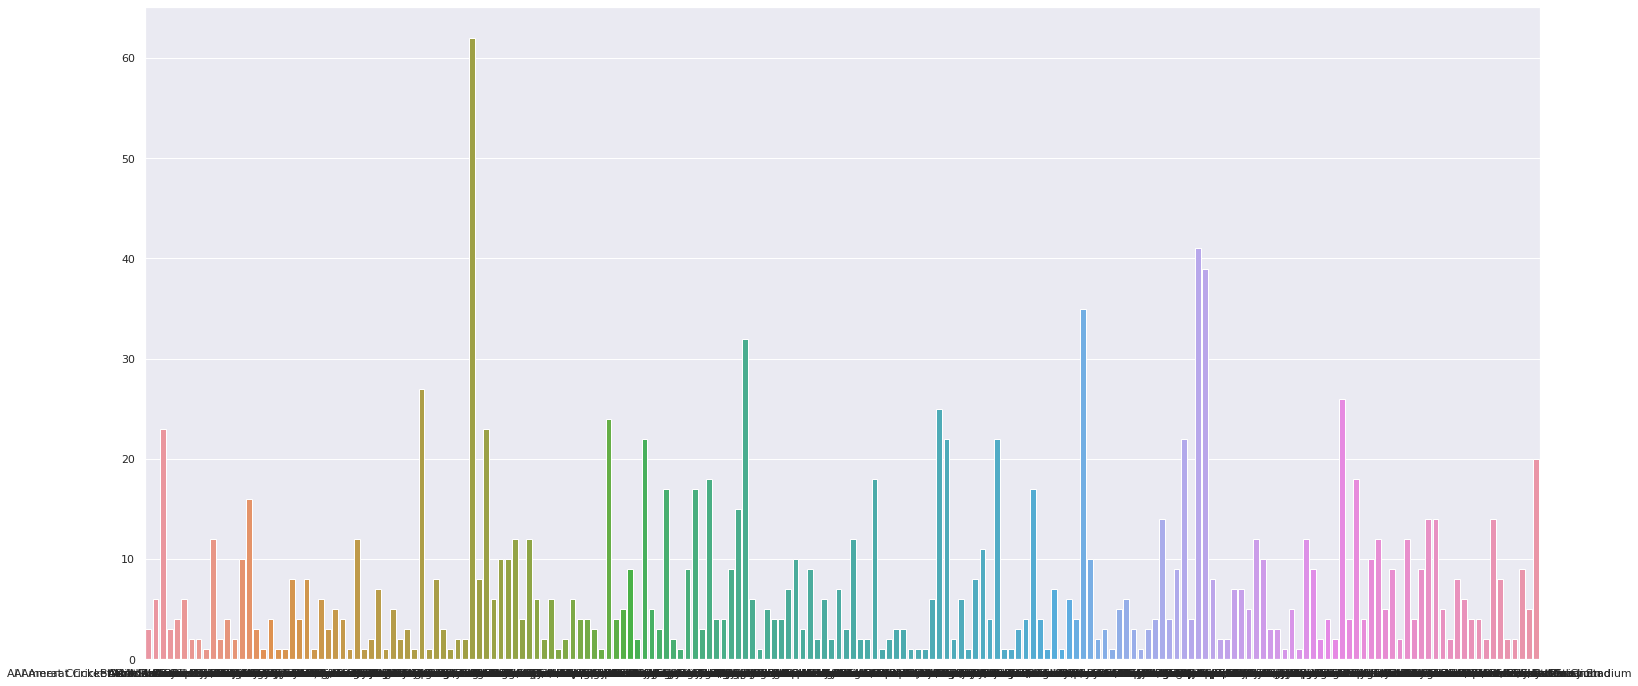

In [117]:
x,y = np.unique(T20_df["venue"], return_counts= True)
sns.set(rc = {'figure.figsize':(25,12)})
sns.barplot(x,y)